# CIFAR-10 Dataset

I implemented an 24 layer ResNet and used it to perform image classification on the CIFAR-10 dataset. I ran a total of 36 Epochs on the training data. The batch size is 128, and I varied the learning rate, optimizer and if regularization is used. The following is the summary of the results.

| Epoch       | Learning rate | Regularization  | Optimizer | Test set accuracy | Train set accuracy |
|:-----------:|:-------------:|:---------------:|:---------:|:-----------------:|:------------------:|
| 1-8         | 0.05          | 0.0001          | Adam      | 0.5128            | 0.527              |
| 9-16        | 0.025         | No Reg.         | Adam      | 0.6248            | 0.64496            |
| 16-20       | 0.02          | 0.0001          | Adam      | 0.7088            | 0.75986            |
| 21-24       | 0.01          | 0.0001          | Adam      | 0.7417            | 0.81488            |
| 25-28       | 0.005         | 0.0001          | Adam      | 0.7552            | 0.8407             |
| 29-36       | 0.01          | 0.0001          | Momentum  | 0.7618            | 0.85436            |

The following is the result of the last run.

In [1]:
%run ../NNSolver/allModules.py
import time
import matplotlib.pyplot as pt
import sys

In [2]:
HPara = {}
HPara['BATCH_SIZE'] = 128           # Mini batch size
HPara['ALPHA'] = 0.01             # Learning rate
HPara['REGULARIZATION'] = True   # True or False
HPara['LAMBDA'] = 0.0001           # L2 regularization weight decay
HPara['OPTIMIZER'] = "Momentum"      # 'Basic' - simple gradient descent, 'Momentum' - momentum, 'Adam'
HPara['BETAM'] = 0.9              # Momentum parameter
HPara['BETAR'] = 0.99
HPara['INITIALIZATION'] = 'He-2015'  

In [3]:
data = np.load('../Dataset/cifar-10/cifar10Data.npz')
imageSrc = ImageDataSource({'instanceName':'cifar10Src'})
imageSrc.setTrainData(data['trainImages'],data['trainLabels'])
imageSrc.setTestData(data['testImages'],data['testLabels'])

In [4]:
rn24 = RN24({'instanceName':'rn24','c1OutChannel':16,'c2OutChannel':32,
          'rnb1OutChannel':32,'rnb4OutChannel':64,'pSize':8,'classNum':10})

In [5]:
imageSolver = Solver(imageSrc,rn24)
Layer.setHyperParameters(HPara)

In [6]:
Normalize.numStats = 100

In [7]:
imageSolver.createStruct()

Softmax - RN24_softmax   has None object as top.


In [8]:
#imageSolver.printIOShape()

In [9]:
imageSolver.loadParameters("cifar10-rn24-parameters5.npz")

In [10]:
#imageSolver.solveNMiniBatch(10)

In [11]:
Solver.miniCnt = 50
N = 8
imageSolver.solveNEpoch(N)
imageSolver.saveParameters('cifar10-rn24-parameters6.npz')

0  50  100  150  200  250  300  350  
Epoch  1  completed, time:  4206.130615949631  seconds
400  450  500  550  600  650  700  750  
Epoch  2  completed, time:  8410.119454145432  seconds
800  850  900  950  1000  1050  1100  1150  
Epoch  3  completed, time:  12618.442509412766  seconds
1200  1250  1300  1350  1400  1450  1500  1550  
Epoch  4  completed, time:  16830.01233625412  seconds
1600  1650  1700  1750  1800  1850  1900  1950  
Epoch  5  completed, time:  21033.390011548996  seconds
2000  2050  2100  2150  2200  2250  2300  
Epoch  6  completed, time:  25237.006262779236  seconds
2350  2400  2450  2500  2550  2600  2650  2700  
Epoch  7  completed, time:  29436.141282081604  seconds
2750  2800  2850  2900  2950  3000  3050  3100  
Epoch  8  completed, time:  33649.519292593  seconds
Time to process  8  epoches:  33649.519847393036  seconds.


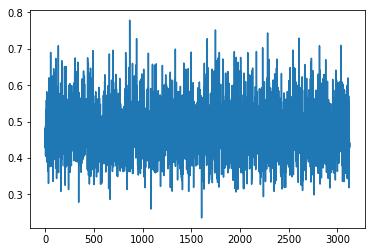

In [12]:
loss = rn24.lossData()
pt.plot(loss)

In [13]:
testAccuracy = imageSolver.calcAccuracy('test')

0  50  
Time to calculate  test  data accuracy:  335.22782158851624  seconds.
Accuracy:  0.7618  with data set size  10000


In [14]:
trainAccuracy = imageSolver.calcAccuracy('train')

0  50  100  150  200  250  300  350  
Time to calculate  train  data accuracy:  1696.2804639339447  seconds.
Accuracy:  0.85436  with data set size  50000
